## Import Library

In [139]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

#for model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ANN model # Artificial Neural Network
import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Import Data

In [140]:
df = pd.read_csv('/content/Big Project Progress Data_ Kelompok 2.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [141]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### EDA

### Information of dataset

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

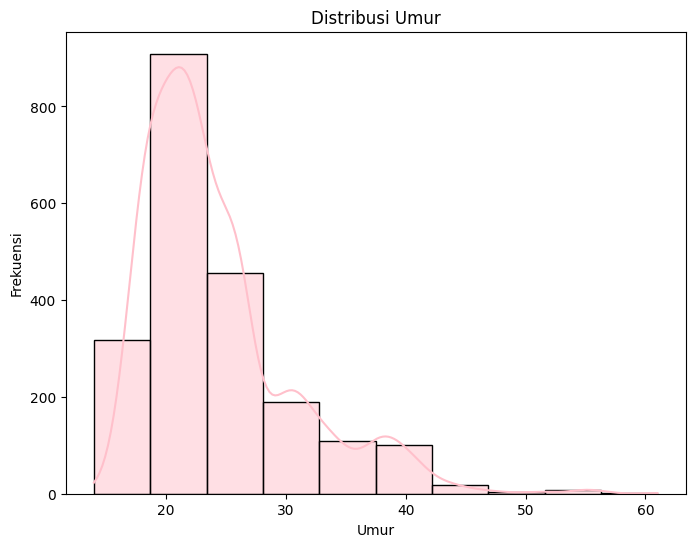

In [143]:
# Contoh visualisasi: Distribusi umur
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='pink')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

In [144]:
# Menggunakan value_counts() dan for loop
columns = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

for column in columns:
    value_counts = df[column].value_counts()
    print(f"Jumlah kategori untuk kolom '{column}':")
    for category, count in value_counts.items():
        print(f"{category}: {count}")
    print()

Jumlah kategori untuk kolom 'Gender':
Male: 1068
Female: 1043

Jumlah kategori untuk kolom 'CALC':
Sometimes: 1401
no: 639
Frequently: 70
Always: 1

Jumlah kategori untuk kolom 'SCC':
no: 2015
yes: 96

Jumlah kategori untuk kolom 'SMOKE':
no: 2067
yes: 44

Jumlah kategori untuk kolom 'family_history_with_overweight':
yes: 1726
no: 385

Jumlah kategori untuk kolom 'CAEC':
Sometimes: 1765
Frequently: 242
Always: 53
no: 51

Jumlah kategori untuk kolom 'MTRANS':
Public_Transportation: 1580
Automobile: 457
Walking: 56
Motorbike: 11
Bike: 7



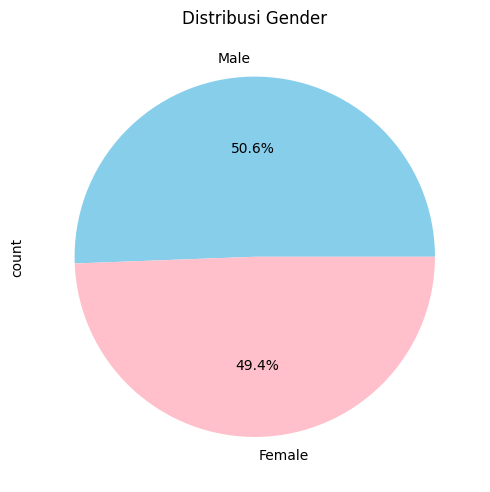

In [145]:
# Visualisasi Pie Plot

plt.figure(figsize=(5, 25))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title(f'Distribusi Gender')
plt.tight_layout()
plt.show()

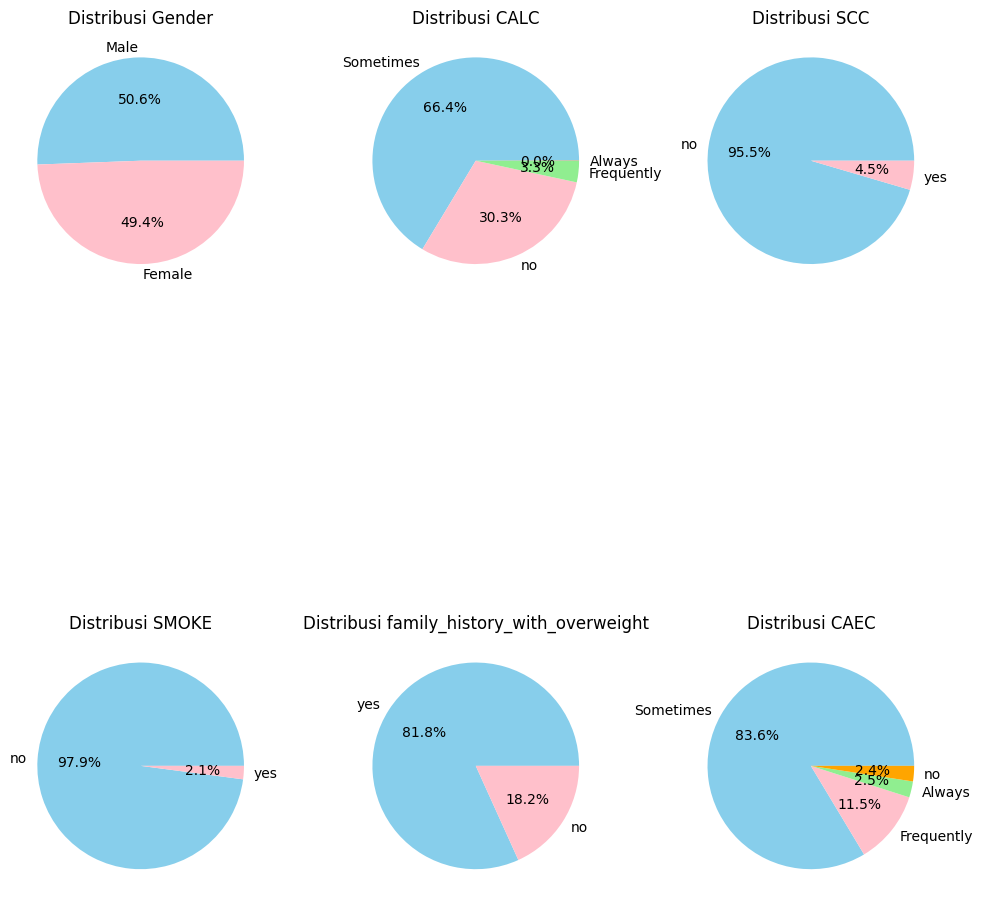

In [146]:
# Visualisasi Pie Plot
columns = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC']

plt.figure(figsize=(10, 15))
for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink', 'lightgreen', 'orange'])
    plt.title(f'Distribusi {column}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

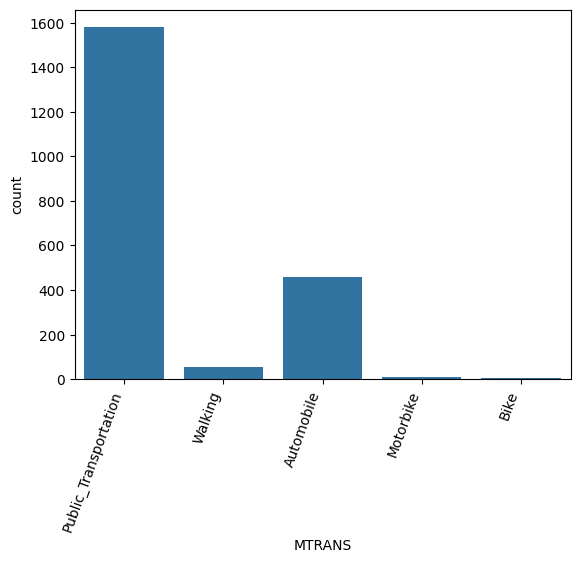

In [147]:
sns.countplot(x = df.MTRANS)
plt.xticks(rotation=70, ha='right')
plt.show()

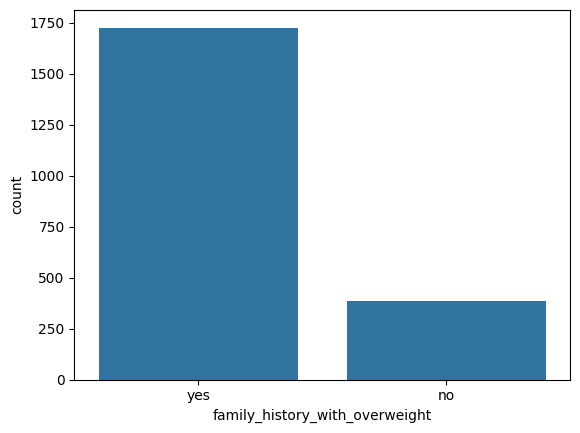

In [148]:
sns.countplot(x = df.family_history_with_overweight)
plt.show()

### Deskripsi statistik

In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


### Check Missing Value

In [150]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [151]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

### Check Duplicated data

In [152]:
df.duplicated().sum()

24

In [153]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   object 
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   object 
 12  FAF                             2087 no

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


In [156]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Loop untuk melakukan label encoding pada setiap kolom kategori
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


<ipython-input-156-73ecf5614270>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-156-73ecf5614270>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-156-73ecf5614270>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [157]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,1
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,1
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,1
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,5
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4


In [158]:
columns_to_convert = ['Age', 'Weight', 'CH2O', 'FAF', 'TUE', 'FCVC', 'NCP']
df[columns_to_convert] = df[columns_to_convert].astype(int)

<ipython-input-158-99766cee289e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].astype(int)


In [159]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,0,1.620000,64,3,0,2,3,0,0,2,1,0,1,2,3,1
1,21,0,1.520000,56,2,0,3,3,1,1,3,1,3,0,2,3,1
2,23,1,1.800000,77,1,0,2,3,0,0,2,1,2,1,2,3,1
3,27,1,1.800000,87,1,0,3,3,0,0,2,0,2,0,2,4,5
4,22,1,1.780000,89,2,0,2,1,0,0,2,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,0,1.710730,131,2,1,3,3,0,0,1,1,1,0,2,3,4
2107,21,0,1.748584,133,2,1,3,3,0,0,2,1,1,0,2,3,4
2108,22,0,1.752206,133,2,1,3,3,0,0,2,1,1,0,2,3,4
2109,24,0,1.739450,133,2,1,3,3,0,0,2,1,1,0,2,3,4


In [160]:
df.corr()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Age,1.000000,0.052735,-0.036012,0.186123,-0.044234,0.055731,-0.013603,-0.079837,-0.113386,0.097240,-0.087867,0.190908,-0.164537,-0.236668,0.082329,-0.600615,0.231015
Gender,0.052735,1.000000,0.626748,0.165106,0.010574,0.061220,-0.316165,0.031439,-0.102435,0.045501,0.182376,0.113492,0.172894,0.075191,0.074564,-0.139044,0.014699
Height,-0.036012,0.626748,1.000000,0.458229,-0.135756,0.180694,-0.068613,0.200204,-0.137078,0.054326,0.204155,0.232258,0.235979,-0.012421,0.058001,-0.068258,0.038700
Weight,0.186123,0.165106,0.458229,1.000000,-0.211986,0.273474,0.204894,0.114243,-0.204377,0.025813,0.060484,0.492043,-0.159514,-0.279047,0.298652,0.009742,0.388058
CALC,-0.044234,0.010574,-0.135756,-0.211986,1.000000,-0.087661,-0.086759,-0.126392,-0.004175,-0.083181,-0.033040,0.028403,0.086511,0.088734,-0.039502,-0.009828,-0.132821
FAVC,0.055731,0.061220,0.180694,0.273474,-0.087661,1.000000,-0.072534,-0.019062,-0.191277,-0.050713,-0.092213,0.214329,-0.160214,-0.053431,0.147921,-0.069422,0.041023
FCVC,-0.013603,-0.316165,-0.068613,0.204894,-0.086759,-0.072534,1.000000,0.140750,0.070511,0.025624,0.047085,0.008030,0.022263,-0.149825,-0.091906,0.107299,0.020297
NCP,-0.079837,0.031439,0.200204,0.114243,-0.126392,-0.019062,0.140750,1.000000,-0.009931,0.033986,0.092599,0.015446,0.130671,0.017310,-0.101852,-0.002913,-0.107885
SCC,-0.113386,-0.102435,-0.137078,-0.204377,-0.004175,-0.191277,0.070511,-0.009931,1.000000,0.047384,0.074456,-0.193947,0.094513,0.032175,-0.109393,0.044381,-0.050936
SMOKE,0.097240,0.045501,0.054326,0.025813,-0.083181,-0.050713,0.025624,0.033986,0.047384,1.000000,0.016615,0.014885,0.022754,0.063696,-0.054960,-0.009995,-0.023341


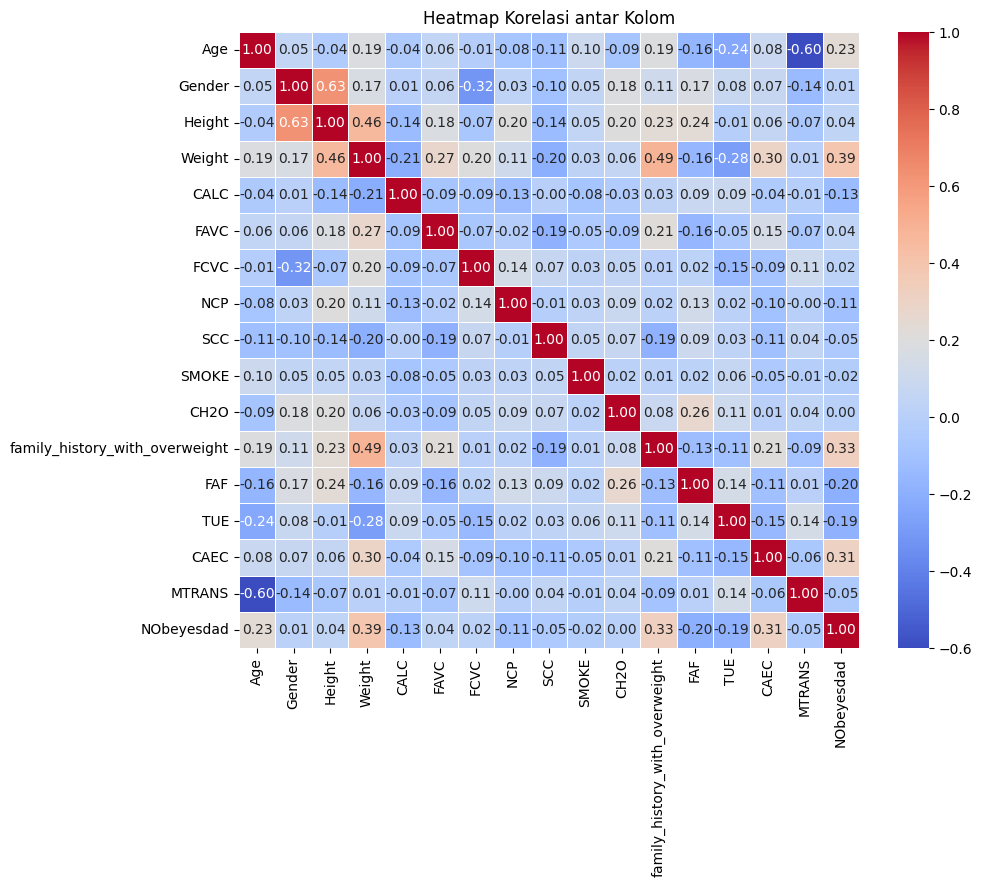

In [161]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

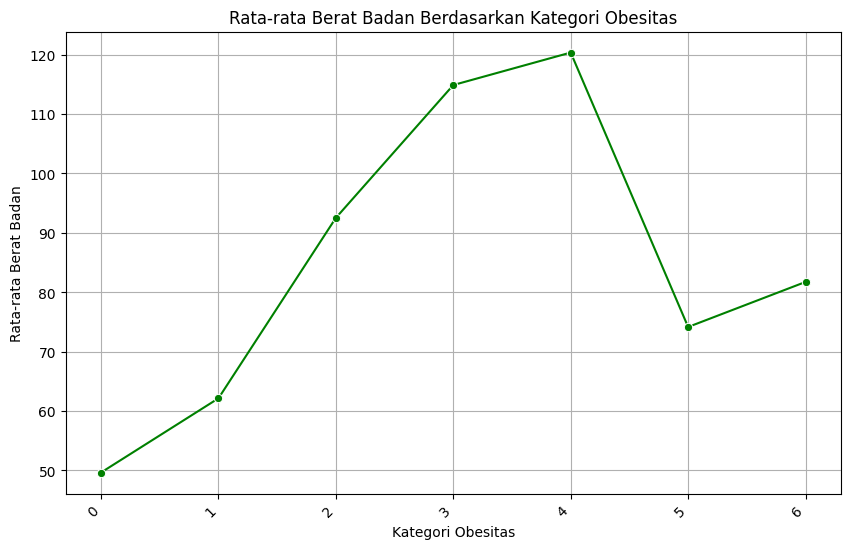

In [162]:
# Agregasi data
avg_height_by_obesity = df.groupby('NObeyesdad')['Weight'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_height_by_obesity, x='NObeyesdad', y='Weight', marker='o', color='g')
plt.title('Rata-rata Berat Badan Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Rata-rata Berat Badan')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

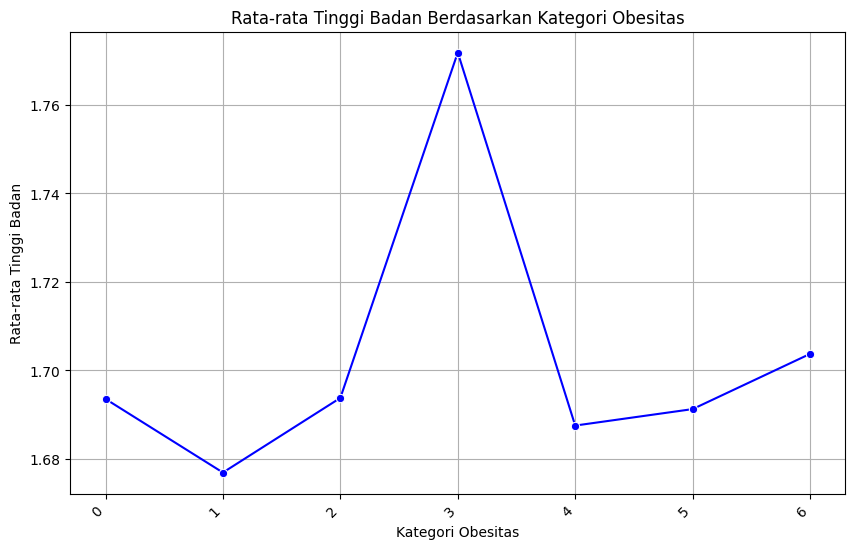

In [163]:
# Agregasi data
avg_height_by_obesity = df.groupby('NObeyesdad')['Height'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_height_by_obesity, x='NObeyesdad', y='Height', marker='o', color='blue')
plt.title('Rata-rata Tinggi Badan Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Rata-rata Tinggi Badan')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

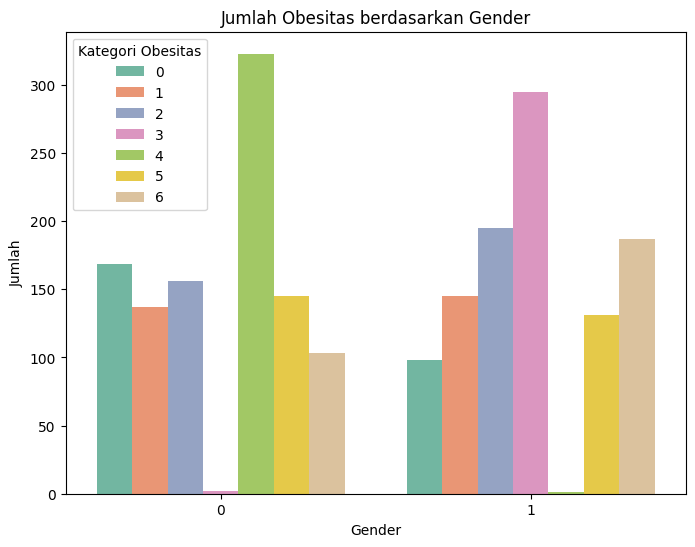

In [164]:
# Plot countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='NObeyesdad', palette='Set2')
plt.title('Jumlah Obesitas berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Obesitas')
plt.show()

### Check Imbalance

In [165]:
df.NObeyesdad.value_counts()

NObeyesdad
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

In [166]:
target = pd.DataFrame(df.NObeyesdad.value_counts())
target

,count
NObeyesdad,
2,351
4,324
3,297
6,290
1,282
5,276
0,267


In [167]:
target.to_csv('Kolom_target.xlsx')

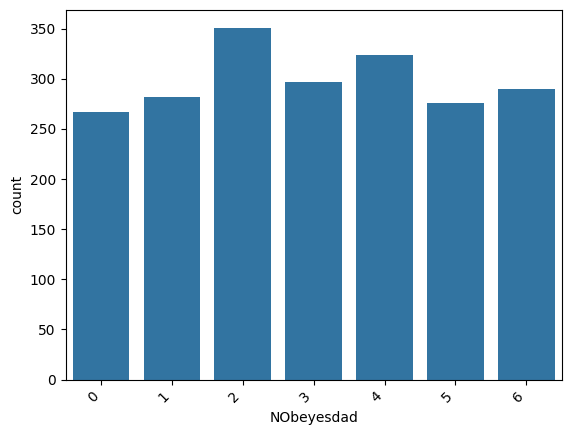

In [168]:
sns.countplot(x=df['NObeyesdad'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [169]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,0,1.620000,64,3,0,2,3,0,0,2,1,0,1,2,3,1
1,21,0,1.520000,56,2,0,3,3,1,1,3,1,3,0,2,3,1
2,23,1,1.800000,77,1,0,2,3,0,0,2,1,2,1,2,3,1
3,27,1,1.800000,87,1,0,3,3,0,0,2,0,2,0,2,4,5
4,22,1,1.780000,89,2,0,2,1,0,0,2,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,0,1.710730,131,2,1,3,3,0,0,1,1,1,0,2,3,4
2107,21,0,1.748584,133,2,1,3,3,0,0,2,1,1,0,2,3,4
2108,22,0,1.752206,133,2,1,3,3,0,0,2,1,1,0,2,3,4
2109,24,0,1.739450,133,2,1,3,3,0,0,2,1,1,0,2,3,4


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   int64  
 1   Gender                          2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   int64  
 4   CALC                            2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   int64  
 7   NCP                             2087 non-null   int64  
 8   SCC                             2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   int64  
 11  family_history_with_overweight  2087 non-null   int64  
 12  FAF                             2087 no

# Scaling

In [171]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [172]:
columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CAEC', 'MTRANS']
scaler = StandardScaler()
df_scale = scaler.fit_transform(df[columns])

In [173]:
df[columns]=df_scale

<ipython-input-173-149c110829f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns]=df_scale


In [174]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.475238,0,-0.887408,-0.862848,3,0,-0.354715,0.563753,0,0,0.497664,1,-0.87843,1.057767,0.318128,0.506768,1
1,-0.475238,0,-1.960788,-1.169590,2,0,1.308860,0.563753,1,1,2.189235,1,2.71155,-0.657509,0.318128,0.506768,1
2,-0.159371,1,1.044677,-0.364393,1,0,-0.354715,0.563753,0,0,0.497664,1,1.51489,1.057767,0.318128,0.506768,1
3,0.472363,1,1.044677,0.019034,1,0,1.308860,0.563753,0,0,0.497664,0,1.51489,-0.657509,0.318128,1.297220,5
4,-0.317305,1,0.830001,0.095719,2,0,-0.354715,-1.872172,0,0,0.497664,0,-0.87843,-0.657509,0.318128,0.506768,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.633172,0,0.086470,1.706112,2,1,1.308860,0.563753,0,0,-1.193907,1,0.31823,-0.657509,0.318128,0.506768,4
2107,-0.475238,0,0.492788,1.782797,2,1,1.308860,0.563753,0,0,0.497664,1,0.31823,-0.657509,0.318128,0.506768,4
2108,-0.317305,0,0.531665,1.782797,2,1,1.308860,0.563753,0,0,0.497664,1,0.31823,-0.657509,0.318128,0.506768,4
2109,-0.001438,0,0.394745,1.782797,2,1,1.308860,0.563753,0,0,0.497664,1,0.31823,-0.657509,0.318128,0.506768,4


# Splitting

In [175]:
X = df.drop(columns='NObeyesdad')
y = df.NObeyesdad

X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1502, 16), (376, 16), (209, 16), (1502,), (376,), (209,))

In [176]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1502
Jumlah data validasi: 376
Jumlah data test: 209


In [177]:
y_train

1016    6
1297    2
76      0
408     1
601     0
       ..
1276    2
1474    2
1873    4
1004    6
1352    2
Name: NObeyesdad, Length: 1502, dtype: int64

In [178]:
X_train

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1016,-0.949039,1,-0.514333,-0.249365,3,1,-0.354715,-0.654210,0,0,-1.193907,1,0.31823,-0.657509,0.318128,0.506768
1297,-0.317305,1,0.512108,0.325775,3,1,-0.354715,0.563753,0,0,2.189235,1,2.71155,2.773044,0.318128,0.506768
76,-0.001438,0,-1.102084,-1.591359,3,0,-0.354715,0.563753,0,0,0.497664,1,0.31823,-0.657509,2.494958,0.506768
408,-0.633172,1,1.152015,-0.287708,2,0,1.308860,-1.872172,0,0,0.497664,1,-0.87843,-0.657509,0.318128,0.506768
601,-0.791105,0,-1.059975,-1.591359,2,0,1.308860,0.563753,1,0,-1.193907,0,0.31823,-0.657509,-1.858702,0.506768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,-0.791105,1,-0.026943,0.479146,3,1,-0.354715,-0.654210,0,0,0.497664,1,-0.87843,1.057767,0.318128,0.506768
1474,-0.317305,0,-0.929431,-0.172680,3,1,-0.354715,-1.872172,0,0,0.497664,1,-0.87843,-0.657509,0.318128,0.506768
1873,-0.159371,0,-0.121551,1.054286,2,1,1.308860,0.563753,0,0,0.497664,1,-0.87843,-0.657509,0.318128,0.506768
1004,-1.106972,1,-0.028704,-0.134337,3,0,-0.354715,-0.654210,0,0,-1.193907,1,0.31823,-0.657509,0.318128,0.506768


### Model

In [179]:
# Memilih model terbaik untuk pengujian lebih lanjut
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [180]:
y_pred = model.predict(X_test)
y_pred

array([2, 3, 5, 0, 3, 5, 2, 4, 0, 0, 3, 2, 4, 1, 6, 5, 5, 3, 5, 6, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 1, 1, 0, 5, 0, 2, 5, 4,
       0, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 6, 6, 2, 1, 3, 1, 3,
       2, 5, 2, 2, 6, 1, 2, 5, 2, 0, 3, 0, 0, 0, 5, 5, 4, 2, 0, 0, 3, 6,
       1, 2, 4, 3, 3, 3, 2, 3, 2, 4, 6, 4, 0, 6, 3, 6, 0, 5, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 0, 3, 0, 5, 2, 0, 5, 4, 5, 1, 5, 1, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 6, 5, 1, 4, 5, 5, 4, 4, 5, 0, 4, 4, 2,
       0, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 0, 1, 4, 6, 1, 2, 0, 3, 5, 0, 5,
       6, 6, 6, 0, 0, 5, 3, 3, 0, 6, 1, 3, 6, 2, 3, 3, 2, 1, 4, 1, 2, 5,
       2, 0, 2, 4, 2, 5, 6, 2, 2, 6, 5])

## Evaluasi Model

In [181]:
# Evaluasi model terbaik
print("Evaluation of the best model:")
print("Accuracy:", accuracy_score(y_test, y_pred))

Evaluation of the best model:
Accuracy: 0.861244019138756


In [182]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.91      0.57      0.70        35
           2       0.92      0.94      0.93        35
           3       0.97      0.97      0.97        30
           4       0.96      1.00      0.98        26
           5       0.77      0.87      0.82        31
           6       0.83      0.76      0.79        25

    accuracy                           0.86       209
   macro avg       0.87      0.87      0.86       209
weighted avg       0.87      0.86      0.86       209



In [183]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix:


array([[26,  1,  0,  0,  0,  0,  0],
       [10, 20,  0,  0,  0,  5,  0],
       [ 0,  0, 33,  1,  0,  0,  1],
       [ 0,  0,  0, 29,  1,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0],
       [ 0,  1,  0,  0,  0, 27,  3],
       [ 0,  0,  3,  0,  0,  3, 19]])

Text(0.5, 1.0, 'Confusion Matrix Model')

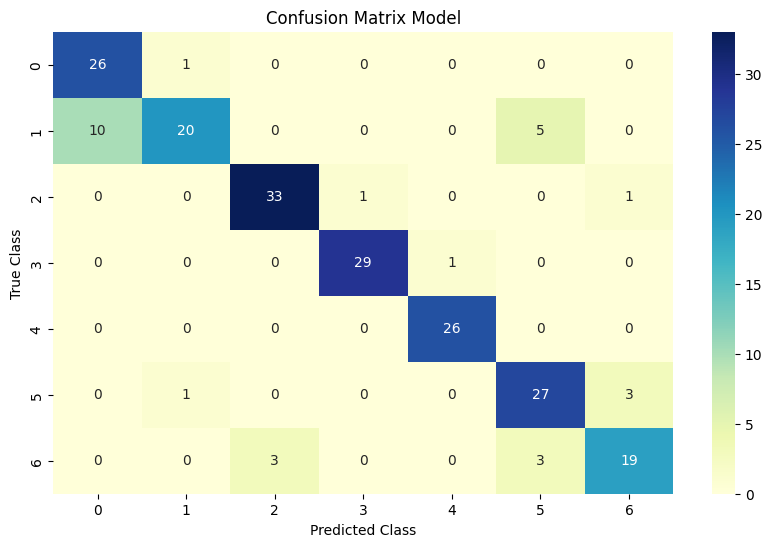

In [184]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

# ANN

# Splitting

In [185]:
X = df.drop(columns='NObeyesdad')
y = df.NObeyesdad

X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1502, 16), (376, 16), (209, 16), (1502,), (376,), (209,))

In [186]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1502
Jumlah data validasi: 376
Jumlah data test: 209


In [187]:
y_train

1016    6
1297    2
76      0
408     1
601     0
       ..
1276    2
1474    2
1873    4
1004    6
1352    2
Name: NObeyesdad, Length: 1502, dtype: int64

In [188]:
X_train

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1016,-0.949039,1,-0.514333,-0.249365,3,1,-0.354715,-0.654210,0,0,-1.193907,1,0.31823,-0.657509,0.318128,0.506768
1297,-0.317305,1,0.512108,0.325775,3,1,-0.354715,0.563753,0,0,2.189235,1,2.71155,2.773044,0.318128,0.506768
76,-0.001438,0,-1.102084,-1.591359,3,0,-0.354715,0.563753,0,0,0.497664,1,0.31823,-0.657509,2.494958,0.506768
408,-0.633172,1,1.152015,-0.287708,2,0,1.308860,-1.872172,0,0,0.497664,1,-0.87843,-0.657509,0.318128,0.506768
601,-0.791105,0,-1.059975,-1.591359,2,0,1.308860,0.563753,1,0,-1.193907,0,0.31823,-0.657509,-1.858702,0.506768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,-0.791105,1,-0.026943,0.479146,3,1,-0.354715,-0.654210,0,0,0.497664,1,-0.87843,1.057767,0.318128,0.506768
1474,-0.317305,0,-0.929431,-0.172680,3,1,-0.354715,-1.872172,0,0,0.497664,1,-0.87843,-0.657509,0.318128,0.506768
1873,-0.159371,0,-0.121551,1.054286,2,1,1.308860,0.563753,0,0,0.497664,1,-0.87843,-0.657509,0.318128,0.506768
1004,-1.106972,1,-0.028704,-0.134337,3,0,-0.354715,-0.654210,0,0,-1.193907,1,0.31823,-0.657509,0.318128,0.506768


### Model

In [189]:
X_train.shape

(1502, 16)

In [190]:
X_train.shape[0]

1502

In [191]:
X_train.shape[1]

16

f(x) = max(0,x)

jika input < 0 , maka f(x) = 0
jika input > 0 , maka f(x) = x

In [192]:
model = Sequential()
model.add(Dense(units= 32,activation='relu', input_shape=(X_train.shape[1],))) #input layer
model.add(Dense(units = 64,activation='relu')) #hidden # sunction activation = relu (leaky relu, dll), sigmoid, tanh, softmax
model.add(Dense(units = 32,activation='relu')) #hidden
model.add(Dense(7, activation='softmax')) # gunakan softmax: output > 2,
                                          # gunakan sigmoid: output = 2
model.compile(loss ='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #  optimizer='adam', SGD, Adamax
model.summary() # loss ='categorical_crossentropy', sparse_categorical_crossentropy, binary_crossentropy

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 7)                 231       
                                                                 
Total params: 4967 (19.40 KB)
Trainable params: 4967 (19.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode = 'min', restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/150
47/47 [==============================] - 1s 8ms/step - loss: 1.8030 - accuracy: 0.3023 - val_loss: 1.5812 - val_accuracy: 0.4521
Epoch 2/150
47/47 [==============================] - 0s 4ms/step - loss: 1.3992 - accuracy: 0.5233 - val_loss: 1.1512 - val_accuracy: 0.6463
Epoch 3/150
47/47 [==============================] - 0s 6ms/step - loss: 0.9915 - accuracy: 0.6498 - val_loss: 0.8099 - val_accuracy: 0.6941
Epoch 4/150
47/47 [==============================] - 0s 4ms/step - loss: 0.7072 - accuracy: 0.7636 - val_loss: 0.6191 - val_accuracy: 0.7686
Epoch 5/150
47/47 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.8302 - val_loss: 0.4919 - val_accuracy: 0.8431
Epoch 6/150
47/47 [==============================] - 0s 4ms/step - loss: 0.4160 - accuracy: 0.8782 - val_loss: 0.4077 - val_accuracy: 0.8511
Epoch 7/150
47/47 [==============================] - 0s 4ms/step - loss: 0.3489 - accuracy: 0.8915 - val_loss: 0.3491 - val_accuracy: 0.8830
Epoch 8/150
4

# Evaluate model

In [194]:
evaluation = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9713


## **VISUALISASI**

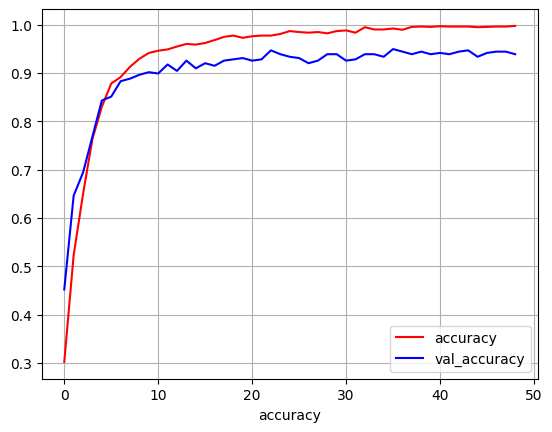

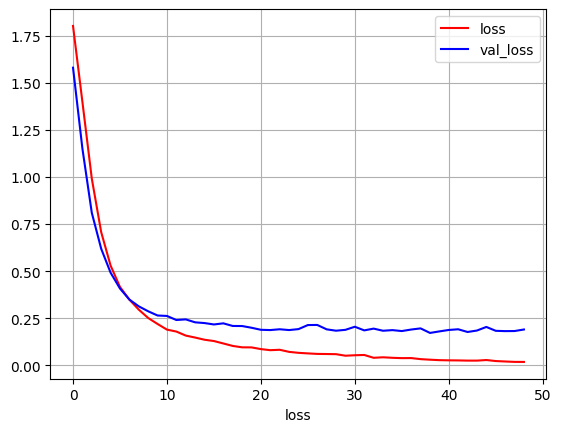

In [195]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'red')
    plt.plot(history.history['val_'+string], color = 'blue')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.grid()
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [196]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

7/7 [==============================] - 0s 3ms/step


array([2, 3, 5, 0, 3, 5, 6, 4, 0, 1, 3, 2, 4, 1, 6, 5, 5, 3, 6, 5, 4, 5,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 3, 6, 4, 1, 1, 0, 5, 1, 2, 5, 4,
       1, 5, 3, 5, 1, 4, 6, 0, 2, 4, 4, 4, 5, 2, 6, 5, 6, 2, 1, 3, 1, 3,
       2, 5, 6, 2, 6, 0, 2, 1, 2, 0, 3, 1, 0, 0, 5, 1, 4, 2, 0, 0, 3, 6,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 4, 6, 4, 1, 6, 2, 6, 1, 1, 0, 5, 4, 2,
       1, 3, 2, 0, 4, 3, 5, 3, 1, 3, 0, 5, 2, 0, 5, 4, 5, 1, 5, 1, 3, 0,
       6, 2, 5, 2, 6, 1, 5, 5, 4, 5, 5, 1, 4, 1, 5, 4, 4, 5, 0, 4, 4, 2,
       0, 3, 0, 4, 4, 2, 1, 3, 3, 0, 3, 1, 1, 4, 6, 0, 2, 0, 3, 5, 0, 6,
       6, 2, 6, 1, 0, 1, 3, 3, 0, 6, 1, 3, 6, 2, 3, 3, 2, 5, 4, 1, 2, 5,
       6, 1, 2, 4, 2, 5, 6, 2, 2, 6, 5])

In [197]:
y_test

1337    2
1763    3
389     5
595     0
1735    3
       ..
1138    6
361     2
1346    2
1134    6
757     5
Name: NObeyesdad, Length: 209, dtype: int64

In [198]:
print("Evaluation model ann:")
print("Accuracy:", accuracy_score(y_test, y_pred))

Evaluation model ann:
Accuracy: 0.9712918660287081


In [199]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      0.91      0.93        35
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        26
           5       0.91      0.94      0.92        31
           6       1.00      0.96      0.98        25

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209



In [200]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix:


array([[27,  0,  0,  0,  0,  0,  0],
       [ 1, 32,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0],
       [ 0,  2,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1, 24]])

Text(0.5, 1.0, 'Confusion Matrix Model')

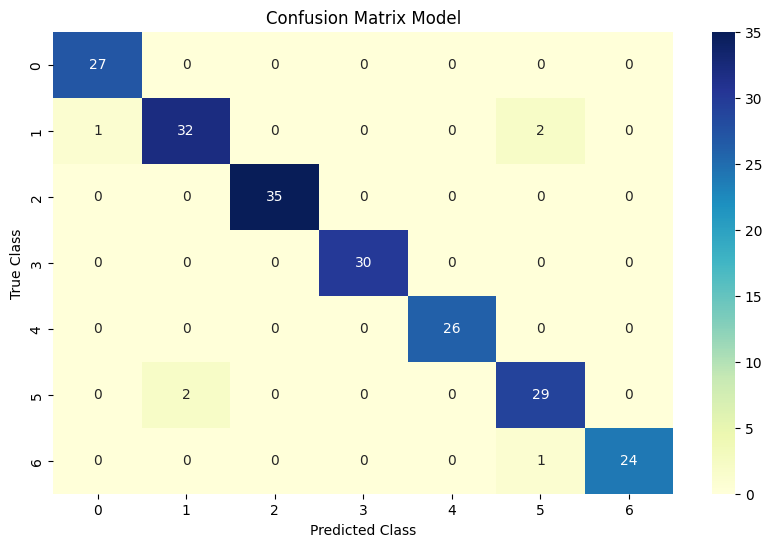

In [201]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [202]:
import pickle

In [206]:
filename1 = 'obesity_model.pkl'
pickle.dump(model,open (filename1,"wb"))

In [207]:
filename2 = 'Scaler.pkl'
pickle.dump(scaler,open (filename2,"wb"))

In [208]:
filename3 = 'le.pkl'
pickle.dump(label_encoder,open (filename3,"wb"))